In [11]:
import numpy as np
class HMM:
    def __init__(self,A,B,pi):
        self.A=A
        self.B=B
        self.pi=pi
    def forward(self,obs_seq):
        T=len(obs_seq)
        N=self.A.shape[0]
        alpha=np.zeros((N,T))
        alpha[:,0]=self.pi*self.B[:,obs_seq[0]]
        for t in range(1,T):
            for j in range(N):
                alpha[j,t] = np.sum(alpha[:,t-1]*self.A[:,j])*self.B[j,obs_seq[t]]
        return alpha
    def backward(self,obs_seq):
        T=len(obs_seq)
        N=self.A.shape[0]
        beta=np.zeros((N,T))
        beta[:,-1]=1
        for t in range(T-2,-1,-1):
            for i in range(N):
                beta[i,t]=np.sum(self.A[i,:]*self.B[:,obs_seq[t+1]]*beta[:,t+1])
        return beta
    def seq_prob(self,obs_seq):
        alpha=self.forward(obs_seq)
        prob=np.sum(alpha[:,-1])
        return prob

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
# Your matrices A, B, pi, and observed sequence
A = np.array([
 [0.8, 0.0,0.0],
 [0.0, 0.2,0.0],
 [0.0,0.0,1.0]
])
B = np.array([
 [0.6,0.2,0.2],
 [0.1,0.1,0.8],
 [0.5,0.2,0.3]
])
pi = np.array([1.0, 0.0, 0.0])


In [13]:
obs_seq = [1, 0, 1]

In [14]:
emm=['A','B','C']

In [15]:
G_transitions = nx.DiGraph()
G_transitions.add_nodes_from(['x', 'y','z'])
G_transitions.add_edge('x', 'x', weight=A[0, 0])
G_transitions.add_edge('x', 'y', weight=A[0, 1])
G_transitions.add_edge('x', 'z', weight=A[0, 2])
G_transitions.add_edge('y', 'x', weight=A[1, 0])
G_transitions.add_edge('y', 'y', weight=A[1, 1])
G_transitions.add_edge('y', 'z', weight=A[1, 2])
G_transitions.add_edge('z', 'x', weight=A[2, 0])
G_transitions.add_edge('z', 'y', weight=A[2, 1])
G_transitions.add_edge('z', 'z', weight=A[2, 2])

In [16]:
G_emissions = nx.DiGraph()
G_emissions.add_nodes_from(['x', 'y','z'])
for i in range(len(B[0])):
    G_emissions.add_edge('x', f'{emm[i]}', weight=B[0, i])
for i in range(len(B[1])):
    G_emissions.add_edge('y', f'{emm[i]}', weight=B[1, i])
for i in range(len(B[2])):
    G_emissions.add_edge('z', f'{emm[i]}', weight=B[2, i])

In [17]:
def draw_graph(G, title, pos=None):
    if pos is None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='orange', font_size=12, arrows=True)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

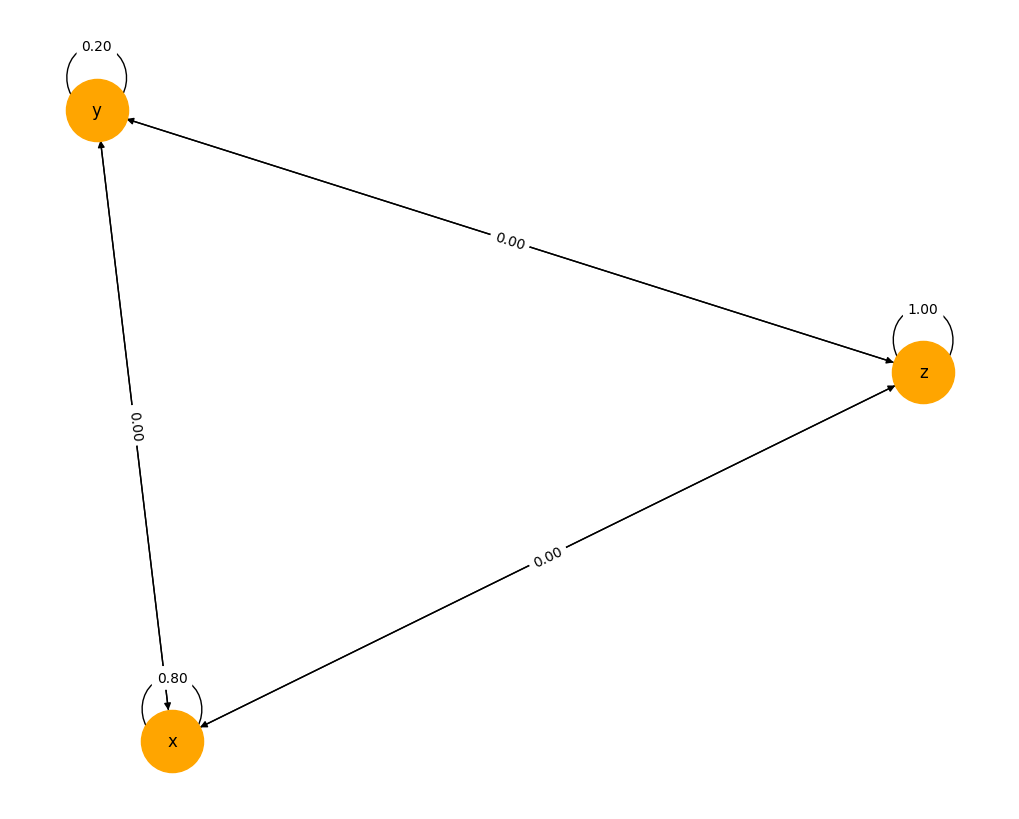

In [18]:
plt.figure(figsize=(10, 8))
draw_graph(G_transitions, 'Transition Probabilities',pos=nx.spring_layout(G_transitions))
plt.show()

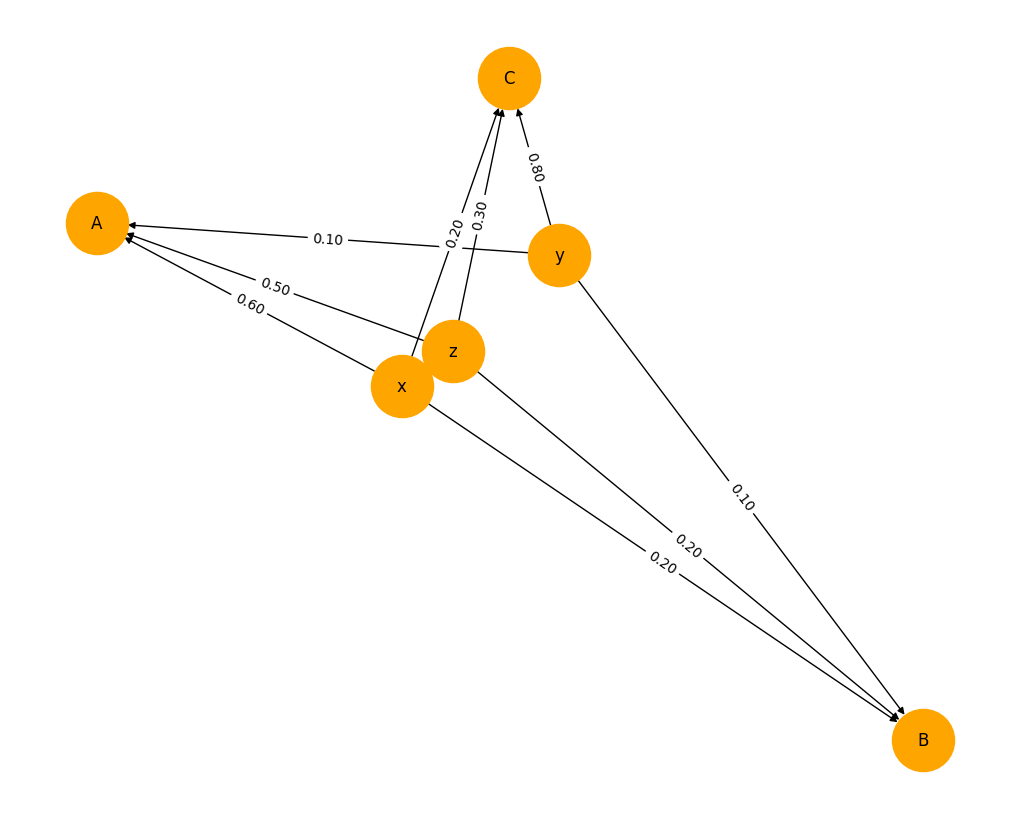

In [21]:
plt.figure(figsize=(10,8))
draw_graph(G_emissions, 'Emission Probabilities', pos=nx.spring_layout(G_emissions))
plt.show()

In [22]:
hmm=HMM(A,B,pi)
obs_seq = [1,0,1]
for_prob=hmm.seq_prob(obs_seq)
print("Probability of the observation sequence (forward algorithm):", for_prob)
back_prob=hmm.seq_prob(obs_seq)
print("Probability of the observation sequence (backward algorithm):",back_prob)

Probability of the observation sequence (forward algorithm): 0.015360000000000006
Probability of the observation sequence (backward algorithm): 0.015360000000000006
